In [1]:
%config IPCompleter.greedy=True
get_ipython().run_line_magic('config', 'IPCompleter.greedy=True')
import IPython.display as ipd

In [2]:
#ipd.Audio(r'''C:\Users\dk\Desktop\samples\apple1.wav''')

In [3]:
#ipd.Audio(r'''C:\Users\dk\Desktop\samples\carrot1.wav''')

In [4]:
#ipd.Audio(r'''C:\Users\dk\Desktop\samples\pepper.wav''')

In [5]:
#ipd.Audio(r'''C:\Users\dk\Desktop\samples\salad1.wav''')

In [7]:
import librosa
data, sampling_rate = librosa.load(r'''C:\Users\dk\Desktop\samples\1.wav''')
data

array([-0.00057799,  0.00344364, -0.00010096, ..., -0.00299958,
       -0.00150843, -0.00410081], dtype=float32)

Populating the interactive namespace from numpy and matplotlib


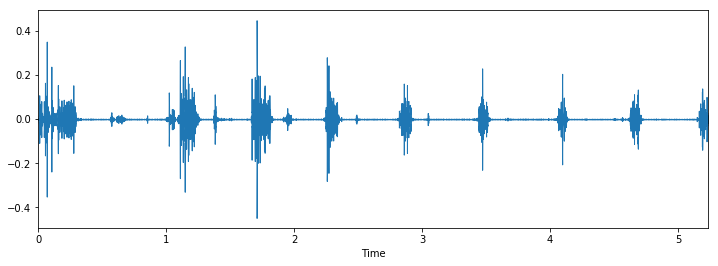

In [10]:
get_ipython().run_line_magic('pylab', 'inline')
import os
import pandas as pd
import librosa
import librosa.display
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

Class:  apple


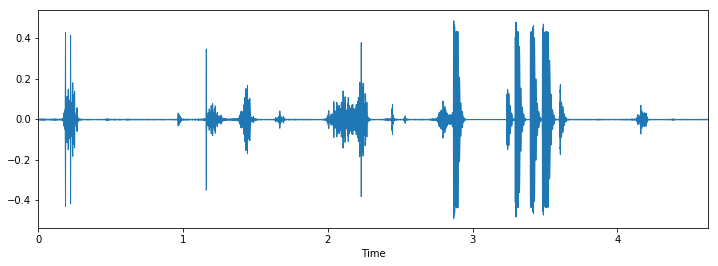

Class:  apple


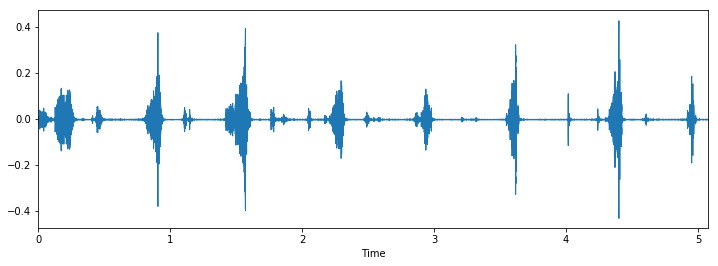

Class:  carrot


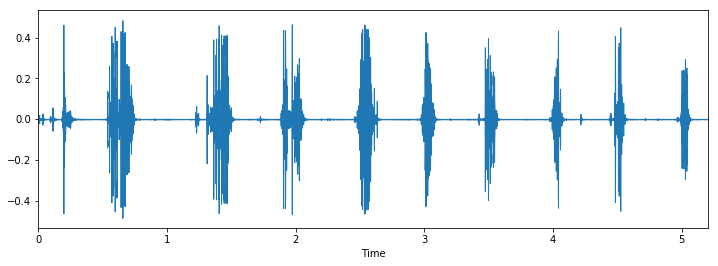

Class:  apple


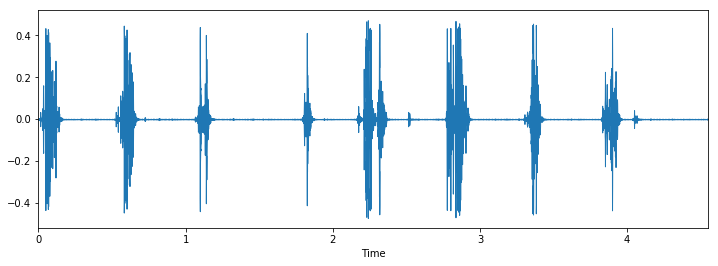

Class:  pepper


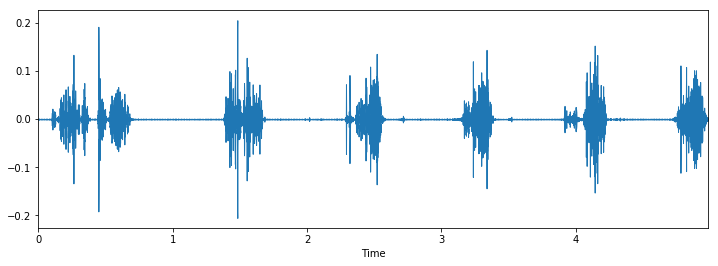

Class:  apple


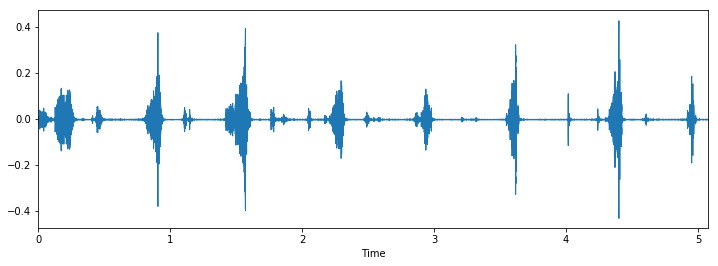

Class:  carrot


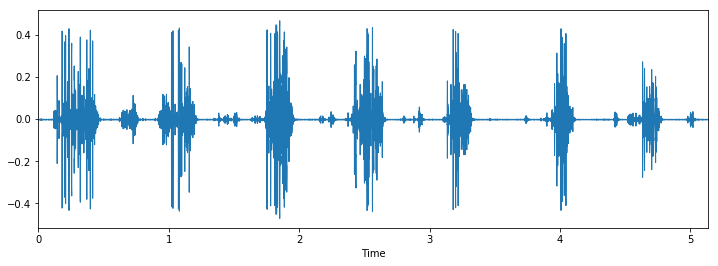

Class:  chips


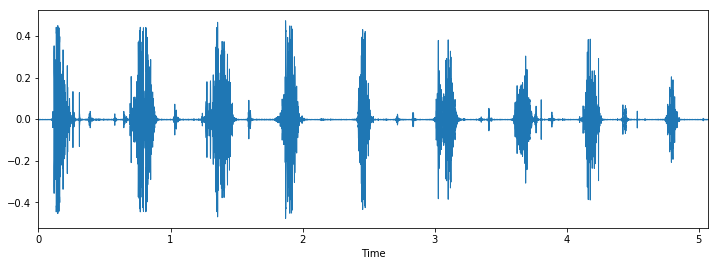

Class:  chips


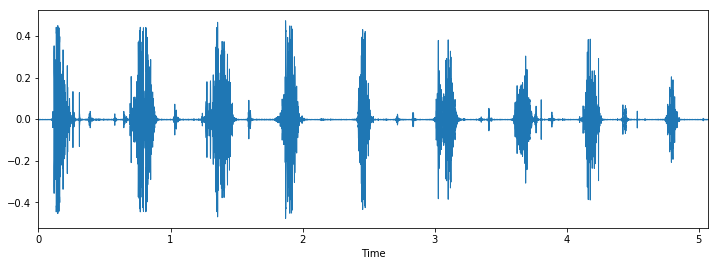

Class:  chips


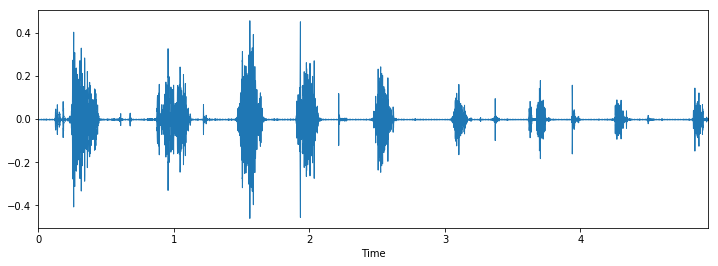

In [11]:
import time
train = pd.read_csv(r'''C:\Users\dk\Desktop\samples\train.csv''')
data_dir = r'''C:\Users\dk\Desktop\samples'''
def load_wave():
    i = random.choice(train.index)

    audio_name = train.ID[i]
    path = os.path.join(data_dir, str(audio_name) + '.wav')

    print('Class: ', train.Class[i])
    x, sr = librosa.load(path)

    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.show()

for i in range(10):
    load_wave()

Class:  salad


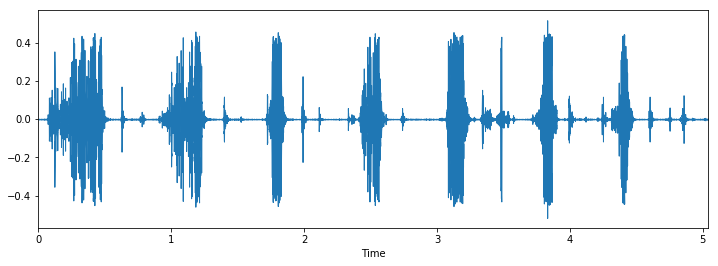

In [12]:
i = random.choice(train.index)

audio_name = train.ID[i]
path = os.path.join(data_dir, str(audio_name) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load(r'''C:\Users\dk\Desktop\samples\\''' + str(train.ID[i]) + '.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [15]:
train.Class.value_counts()

apple     5
pepper    4
carrot    4
chips     4
salad     3
oreo      1
Name: Class, dtype: int64

In [25]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), str(row.ID) + '.wav')

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

temp = train.apply(parser, axis=1, result_type="expand")
temp.columns = ['feature', 'label']
temp.head(2)

,feature,label
0,"[-437.38267777135934, 81.56379524289974, -1.38...",salad
1,"[-428.798613046622, 79.97818024286276, -9.3687...",salad


In [26]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()
print(lb.fit_transform(y)[:5])
y = np_utils.to_categorical(lb.fit_transform(y))
print(y.shape)
print(y[:10])

[5 5 5 4 4]
(21, 6)
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [35]:
model.fit(X, y, batch_size=32, epochs=500, validation_split=0.1, shuffle=True)

Train on 18 samples, validate on 3 samples
Epoch 1/500
18/18 [==============================] - 0s 612us/step - loss: 6.5144 - acc: 0.5000 - val_loss: 10.7613 - val_acc: 0.3333
Epoch 2/500
18/18 [==============================] - 0s 266us/step - loss: 6.0397 - acc: 0.5556 - val_loss: 10.7728 - val_acc: 0.3333
Epoch 3/500
18/18 [==============================] - 0s 504us/step - loss: 7.9709 - acc: 0.4444 - val_loss: 10.8619 - val_acc: 0.3333
Epoch 4/500
18/18 [==============================] - 0s 267us/step - loss: 6.2833 - acc: 0.6111 - val_loss: 11.1119 - val_acc: 0.0000e+00
Epoch 5/500
18/18 [==============================] - 0s 273us/step - loss: 6.5206 - acc: 0.5556 - val_loss: 11.5856 - val_acc: 0.0000e+00
Epoch 6/500
18/18 [==============================] - 0s 649us/step - loss: 5.5433 - acc: 0.5556 - val_loss: 11.4800 - val_acc: 0.0000e+00
Epoch 7/500
18/18 [==============================] - 0s 342us/step - loss: 5.3738 - acc: 0.6667 - val_loss: 11.3764 - val_acc: 0.0000e+00
Epo

Epoch 62/500
18/18 [==============================] - 0s 404us/step - loss: 6.0035 - acc: 0.4444 - val_loss: 10.7470 - val_acc: 0.3333
Epoch 63/500
18/18 [==============================] - 0s 275us/step - loss: 5.3930 - acc: 0.6111 - val_loss: 10.7459 - val_acc: 0.3333
Epoch 64/500
18/18 [==============================] - 0s 400us/step - loss: 4.8856 - acc: 0.6111 - val_loss: 10.7455 - val_acc: 0.3333
Epoch 65/500
18/18 [==============================] - 0s 247us/step - loss: 5.2092 - acc: 0.5556 - val_loss: 10.4361 - val_acc: 0.3333
Epoch 66/500
18/18 [==============================] - 0s 266us/step - loss: 4.6693 - acc: 0.6667 - val_loss: 10.1063 - val_acc: 0.3333
Epoch 67/500
18/18 [==============================] - 0s 281us/step - loss: 3.3989 - acc: 0.7222 - val_loss: 9.8527 - val_acc: 0.3333
Epoch 68/500
18/18 [==============================] - 0s 451us/step - loss: 4.6330 - acc: 0.6111 - val_loss: 9.5190 - val_acc: 0.3333
Epoch 69/500
18/18 [==============================] - 0s 

Epoch 123/500
18/18 [==============================] - 0s 316us/step - loss: 1.2862 - acc: 0.7778 - val_loss: 4.7587 - val_acc: 0.3333
Epoch 124/500
18/18 [==============================] - 0s 376us/step - loss: 1.1930 - acc: 0.8333 - val_loss: 4.7534 - val_acc: 0.3333
Epoch 125/500
18/18 [==============================] - 0s 325us/step - loss: 1.4099 - acc: 0.8333 - val_loss: 4.6759 - val_acc: 0.3333
Epoch 126/500
18/18 [==============================] - 0s 352us/step - loss: 1.2168 - acc: 0.7778 - val_loss: 4.6125 - val_acc: 0.3333
Epoch 127/500
18/18 [==============================] - 0s 336us/step - loss: 1.3222 - acc: 0.7778 - val_loss: 4.6165 - val_acc: 0.3333
Epoch 128/500
18/18 [==============================] - 0s 491us/step - loss: 1.1053 - acc: 0.8889 - val_loss: 4.6373 - val_acc: 0.3333
Epoch 129/500
18/18 [==============================] - 0s 341us/step - loss: 1.1518 - acc: 0.8889 - val_loss: 4.6833 - val_acc: 0.3333
Epoch 130/500
18/18 [==============================] - 

Epoch 184/500
18/18 [==============================] - 0s 259us/step - loss: 1.1330 - acc: 0.8889 - val_loss: 4.8897 - val_acc: 0.3333
Epoch 185/500
18/18 [==============================] - 0s 372us/step - loss: 1.9322 - acc: 0.8889 - val_loss: 4.8995 - val_acc: 0.3333
Epoch 186/500
18/18 [==============================] - 0s 253us/step - loss: 1.2689 - acc: 0.8333 - val_loss: 4.9298 - val_acc: 0.3333
Epoch 187/500
18/18 [==============================] - 0s 370us/step - loss: 1.0395 - acc: 0.8889 - val_loss: 4.9613 - val_acc: 0.3333
Epoch 188/500
18/18 [==============================] - 0s 215us/step - loss: 1.1076 - acc: 0.8889 - val_loss: 5.0369 - val_acc: 0.3333
Epoch 189/500
18/18 [==============================] - 0s 295us/step - loss: 1.1941 - acc: 0.8333 - val_loss: 5.1047 - val_acc: 0.3333
Epoch 190/500
18/18 [==============================] - 0s 284us/step - loss: 1.1032 - acc: 0.8889 - val_loss: 5.1799 - val_acc: 0.3333
Epoch 191/500
18/18 [==============================] - 

Epoch 245/500
18/18 [==============================] - 0s 485us/step - loss: 1.1292 - acc: 0.8889 - val_loss: 4.0581 - val_acc: 0.3333
Epoch 246/500
18/18 [==============================] - 0s 294us/step - loss: 1.3573 - acc: 0.8889 - val_loss: 4.1676 - val_acc: 0.3333
Epoch 247/500
18/18 [==============================] - 0s 452us/step - loss: 1.1510 - acc: 0.8333 - val_loss: 4.2466 - val_acc: 0.3333
Epoch 248/500
18/18 [==============================] - 0s 320us/step - loss: 1.2032 - acc: 0.8333 - val_loss: 4.3070 - val_acc: 0.3333
Epoch 249/500
18/18 [==============================] - 0s 406us/step - loss: 1.1149 - acc: 0.8889 - val_loss: 4.3275 - val_acc: 0.3333
Epoch 250/500
18/18 [==============================] - 0s 251us/step - loss: 1.1031 - acc: 0.8889 - val_loss: 4.3957 - val_acc: 0.3333
Epoch 251/500
18/18 [==============================] - 0s 344us/step - loss: 0.9088 - acc: 0.9444 - val_loss: 4.4755 - val_acc: 0.3333
Epoch 252/500
18/18 [==============================] - 

Epoch 306/500
18/18 [==============================] - 0s 222us/step - loss: 0.9999 - acc: 0.9444 - val_loss: 5.5695 - val_acc: 0.3333
Epoch 307/500
18/18 [==============================] - 0s 470us/step - loss: 0.9713 - acc: 0.9444 - val_loss: 5.5050 - val_acc: 0.3333
Epoch 308/500
18/18 [==============================] - 0s 367us/step - loss: 0.9499 - acc: 0.9444 - val_loss: 5.4606 - val_acc: 0.3333
Epoch 309/500
18/18 [==============================] - 0s 241us/step - loss: 1.1103 - acc: 0.8333 - val_loss: 5.4109 - val_acc: 0.3333
Epoch 310/500
18/18 [==============================] - 0s 171us/step - loss: 0.9942 - acc: 0.8889 - val_loss: 5.3822 - val_acc: 0.3333
Epoch 311/500
18/18 [==============================] - 0s 282us/step - loss: 1.0920 - acc: 0.8889 - val_loss: 5.3465 - val_acc: 0.3333
Epoch 312/500
18/18 [==============================] - 0s 292us/step - loss: 1.0276 - acc: 0.9444 - val_loss: 5.3184 - val_acc: 0.3333
Epoch 313/500
18/18 [==============================] - 

Epoch 367/500
18/18 [==============================] - 0s 339us/step - loss: 0.9407 - acc: 0.9444 - val_loss: 5.0078 - val_acc: 0.3333
Epoch 368/500
18/18 [==============================] - 0s 239us/step - loss: 0.9739 - acc: 0.9444 - val_loss: 5.0026 - val_acc: 0.3333
Epoch 369/500
18/18 [==============================] - 0s 326us/step - loss: 0.9213 - acc: 0.9444 - val_loss: 5.0075 - val_acc: 0.3333
Epoch 370/500
18/18 [==============================] - 0s 216us/step - loss: 1.0927 - acc: 0.8333 - val_loss: 5.0035 - val_acc: 0.3333
Epoch 371/500
18/18 [==============================] - 0s 385us/step - loss: 0.9599 - acc: 0.8889 - val_loss: 4.9979 - val_acc: 0.3333
Epoch 372/500
18/18 [==============================] - 0s 284us/step - loss: 0.9603 - acc: 0.9444 - val_loss: 4.9899 - val_acc: 0.3333
Epoch 373/500
18/18 [==============================] - 0s 341us/step - loss: 0.9976 - acc: 0.8889 - val_loss: 4.9798 - val_acc: 0.3333
Epoch 374/500
18/18 [==============================] - 

Epoch 428/500
18/18 [==============================] - 0s 294us/step - loss: 1.0291 - acc: 0.9444 - val_loss: 5.3291 - val_acc: 0.3333
Epoch 429/500
18/18 [==============================] - 0s 378us/step - loss: 1.1009 - acc: 0.8889 - val_loss: 5.3154 - val_acc: 0.3333
Epoch 430/500
18/18 [==============================] - 0s 345us/step - loss: 0.9594 - acc: 0.9444 - val_loss: 5.2981 - val_acc: 0.3333
Epoch 431/500
18/18 [==============================] - 0s 338us/step - loss: 1.0018 - acc: 0.9444 - val_loss: 5.2524 - val_acc: 0.3333
Epoch 432/500
18/18 [==============================] - 0s 230us/step - loss: 0.9100 - acc: 0.9444 - val_loss: 5.2156 - val_acc: 0.3333
Epoch 433/500
18/18 [==============================] - 0s 280us/step - loss: 0.9364 - acc: 0.9444 - val_loss: 5.1936 - val_acc: 0.3333
Epoch 434/500
18/18 [==============================] - 0s 318us/step - loss: 1.0139 - acc: 0.8889 - val_loss: 5.1562 - val_acc: 0.3333
Epoch 435/500
18/18 [==============================] - 

Epoch 489/500
18/18 [==============================] - 0s 256us/step - loss: 0.9058 - acc: 0.9444 - val_loss: 5.3216 - val_acc: 0.3333
Epoch 490/500
18/18 [==============================] - 0s 450us/step - loss: 0.9412 - acc: 0.9444 - val_loss: 5.3924 - val_acc: 0.3333
Epoch 491/500
18/18 [==============================] - 0s 639us/step - loss: 0.9380 - acc: 0.9444 - val_loss: 5.4573 - val_acc: 0.3333
Epoch 492/500
18/18 [==============================] - 0s 407us/step - loss: 1.0693 - acc: 0.8889 - val_loss: 5.5357 - val_acc: 0.3333
Epoch 493/500
18/18 [==============================] - 0s 475us/step - loss: 0.9673 - acc: 0.9444 - val_loss: 5.6113 - val_acc: 0.3333
Epoch 494/500
18/18 [==============================] - 0s 266us/step - loss: 1.1804 - acc: 0.8333 - val_loss: 5.5807 - val_acc: 0.3333
Epoch 495/500
18/18 [==============================] - 0s 328us/step - loss: 0.9613 - acc: 0.9444 - val_loss: 5.5376 - val_acc: 0.3333
Epoch 496/500
18/18 [==============================] - 

In [79]:
result = model.predict(X)
labels = lb.inverse_transform(range(result.shape[1]))
maxidx = result.argmax(1)
for i in range(len(train)):
    print("orig: %s\tfound: %s\tconfidence: %.2f" % (temp.label[i], labels[maxidx[i]], result[i,maxidx[i]]))

orig: salad	found: salad	confidence: 1.00
orig: salad	found: salad	confidence: 1.00
orig: salad	found: salad	confidence: 1.00
orig: pepper	found: pepper	confidence: 0.99
orig: pepper	found: pepper	confidence: 1.00
orig: pepper	found: pepper	confidence: 0.98
orig: pepper	found: apple	confidence: 1.00
orig: oreo	found: oreo	confidence: 1.00
orig: chips	found: chips	confidence: 0.99
orig: chips	found: chips	confidence: 1.00
orig: chips	found: chips	confidence: 1.00
orig: chips	found: chips	confidence: 0.89
orig: carrot	found: carrot	confidence: 1.00
orig: carrot	found: carrot	confidence: 1.00
orig: carrot	found: carrot	confidence: 1.00
orig: carrot	found: carrot	confidence: 1.00
orig: apple	found: apple	confidence: 1.00
orig: apple	found: apple	confidence: 1.00
orig: apple	found: carrot	confidence: 1.00
orig: apple	found: apple	confidence: 1.00
orig: apple	found: chips	confidence: 0.34
